In [194]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
X = np.random.poisson(1, 1000)
Y = np.random.normal(1.22, 1, 1000)

In [270]:
def create_plot(scaler, x, y, ax):
    plt.style.use("rose-pine.mplstyle")
    if scaler == 'Base':
        x_scaled = x
        y_scaled = y
        ax.set_title('Input data', {'fontweight':'bold'})
    else:    
        scaler_of_choice = scaler()
        x_scaled = scaler_of_choice.fit_transform(x.reshape(-1, 1))
        y_scaled = scaler_of_choice.fit_transform(y.reshape(-1, 1))
        ax.set_title(f'{scaler}'[36:-2], fontdict = {'fontweight':'bold'})
    sns.kdeplot(x_scaled.reshape(-1, 1)[:,0], ax = ax)
    sns.kdeplot(y_scaled.reshape(-1, 1)[:,0], ax = ax)
    ax.annotate(f'Pois mean: {np.abs(np.mean(x_scaled.reshape(-1, 1)[:,0])):0.2f}\nNor mean: {np.abs(np.mean(y_scaled.reshape(-1, 1)[:,0])):0.2f}', xy = (3.5, 2))
    ax.annotate(f'Pois std: {np.abs(np.std(x_scaled.reshape(-1, 1)[:,0])):0.2f}\nNor std: {np.abs(np.std(y_scaled.reshape(-1, 1)[:,0])):0.2f}', xy = (3.5, 1.5))

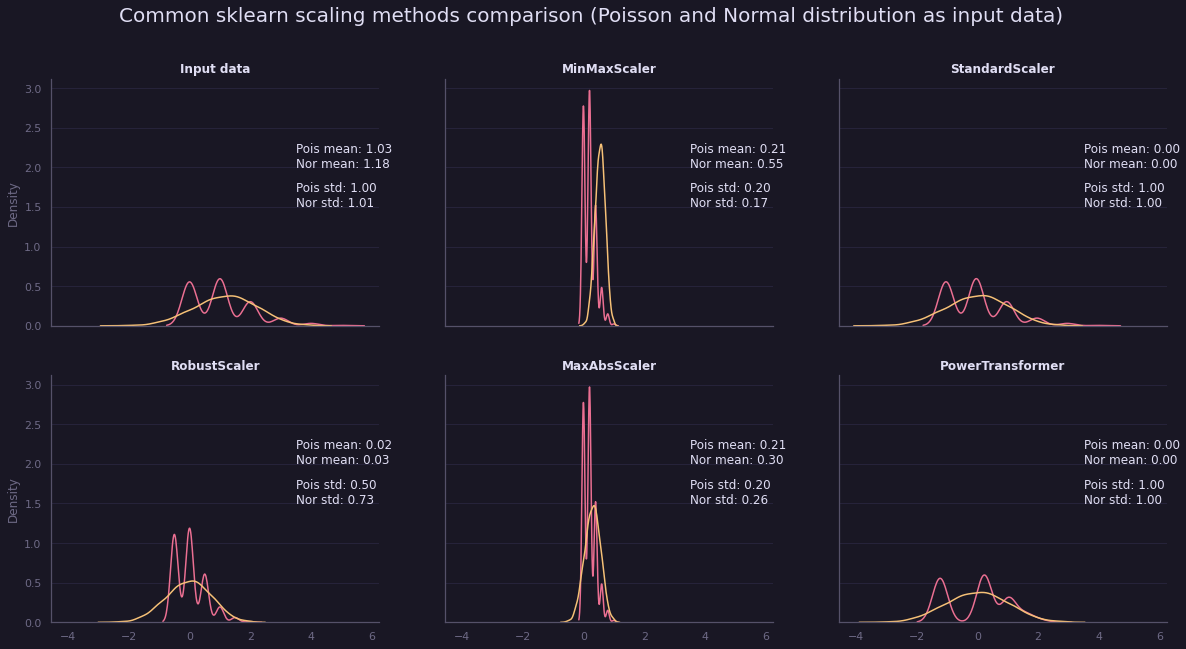

In [273]:
fig, axs = plt.subplots(2, 3, figsize = (20, 10), sharey=True, sharex=True)
create_plot('Base', X, Y, axs[0, 0])
create_plot(MinMaxScaler, X, Y, axs[0, 1])
create_plot(StandardScaler, X, Y, axs[0, 2])
create_plot(RobustScaler, X, Y, axs[1, 0])
create_plot(MaxAbsScaler, X, Y, axs[1, 1])
create_plot(PowerTransformer, X, Y, axs[1, 2])
fig.suptitle('Common sklearn scaling methods comparison (Poisson and Normal distribution as input data)', size=20)
plt.savefig('Scalers.png', format='png')